In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
Data=pd.read_csv('Automobile.csv')
Data

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [38]:
Data.drop(['name','origin'],inplace=True,axis=1)
Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [39]:
data=Data.dropna()
data.drop_duplicates(inplace=True)
data

/var/folders/2t/ly6f0__s5t9_w_drxr2_mvw40000gn/T/ipykernel_2204/1303828525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [40]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
dtype: object

/Users/mahditaghi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mahditaghi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mahditaghi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mahditaghi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


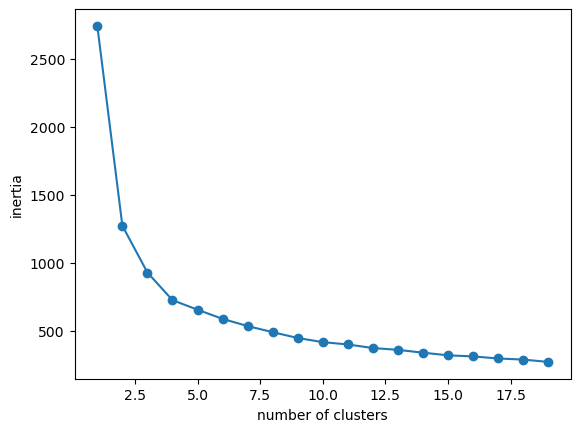

In [43]:
x=np.asarray(data)
x=scale(x)
y=[]
for k in np.arange(1,20):
    kmn=KMeans(n_clusters=k)
    kmn.fit(x)
    y.append(kmn.inertia_)
plt.plot(np.arange(1,20),y,'o-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

/Users/mahditaghi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


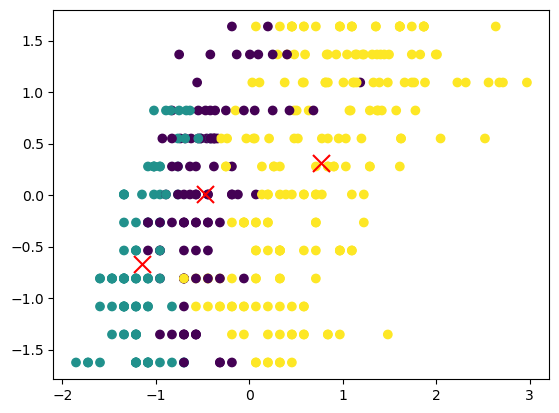

In [51]:
kmn=KMeans(n_clusters=3)
kmn.fit(x)
labels=kmn.predict(x)
center=kmn.cluster_centers_
plt.scatter(x[:,0],x[:,6],c=labels)
plt.scatter(center[:,0],center[:,6],marker='x',s=150,color='r')
plt.show()